In [35]:
## 선 그래프

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# excel 데이터를 데이터프레임 변환
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 첫 5행 출력
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [36]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [37]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [24]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

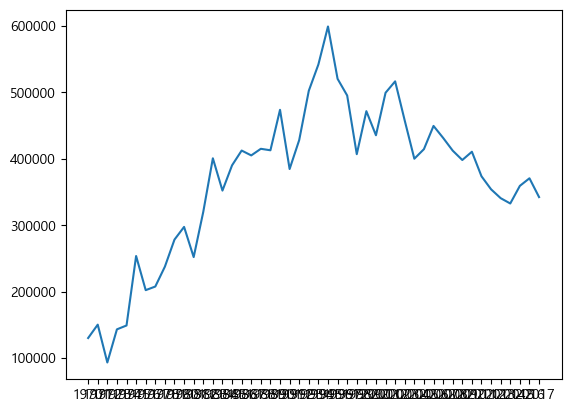

In [38]:
# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

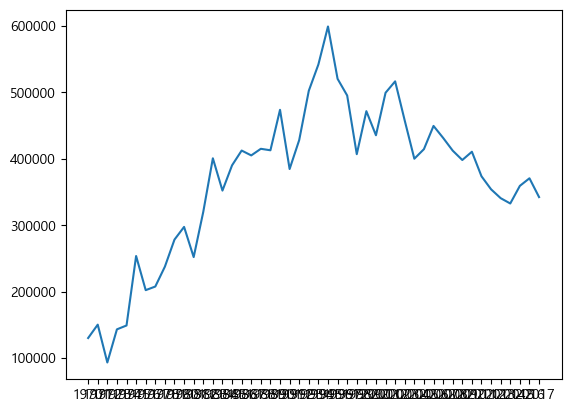

In [39]:
# 판다스 객체를 plot함수에 입력
plt.plot(sr_one)
plt.show()

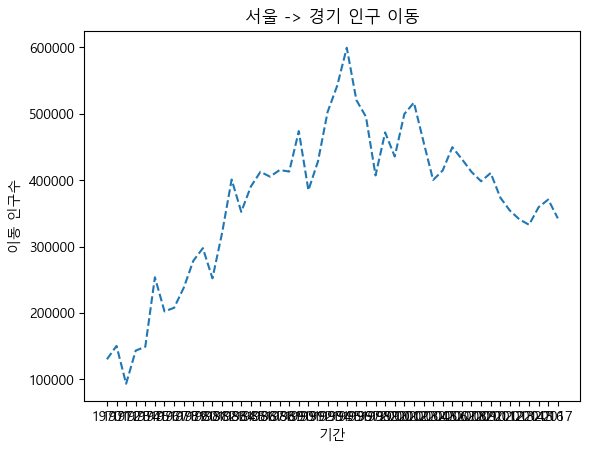

In [40]:
# 차트 제목/축 이름 추가, 선 스타일 지정

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, linestyle='--')

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

In [41]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

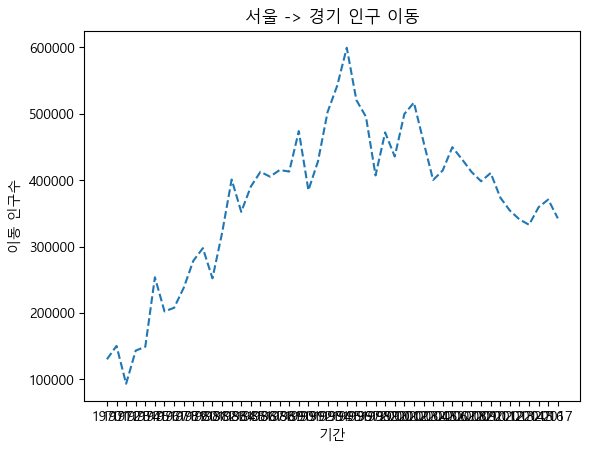

In [53]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# excel 데이터를 데이터프레임 변환
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, linestyle='--')

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

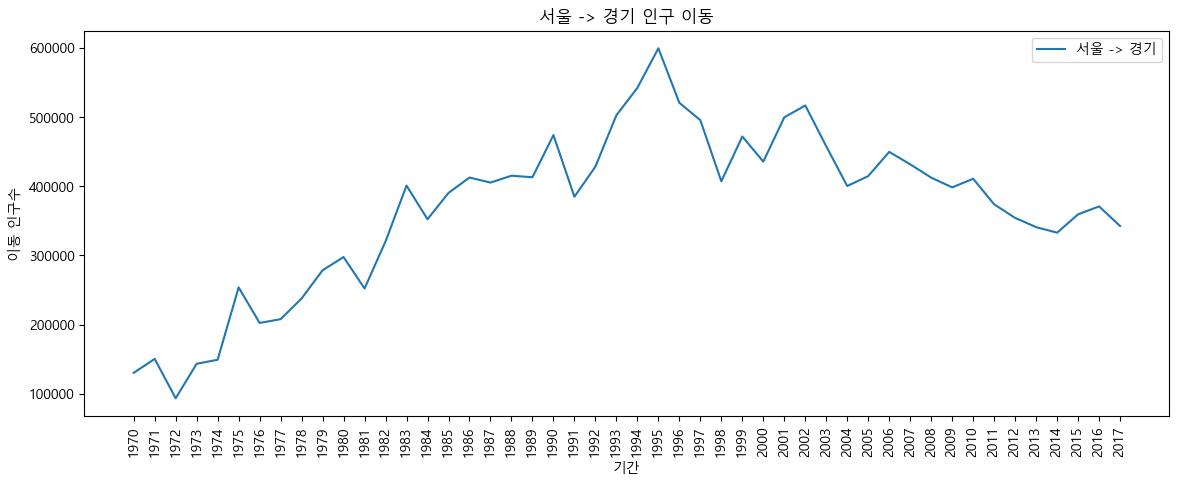

In [54]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 늘리기
plt.figure(figsize=(14,5))

# x축 눈금 레이블 회전하기
plt.xticks(rotation='vertical') #'vertical'대신에 각도를 나타내는 숫자를 입력해도 됨(예시: rotation=90)

# x, y축 데이터를 plot함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'], loc='best') # 범례표시

plt.show()

In [55]:
# matplotlib 스타일 리스트 출력

# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


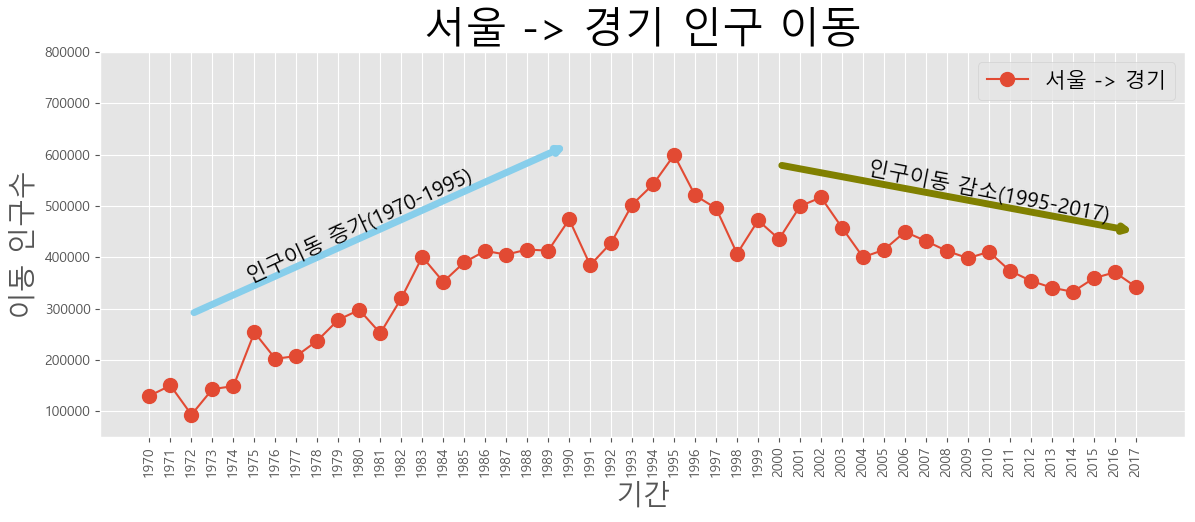

In [56]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 늘리기
plt.figure(figsize=(14,5))

# x축 눈금 레이블 회전하기
plt.xticks(size=10, rotation=90)

# x, y축 데이터를 plot함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

# 범례 표시
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정(최솟값, 최댓값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
            xy=(20,620000),    # 화살표의 머리 부분(끝점)
            xytext=(2, 290000),  # 화살표의 꼬리 부분(시작점)
            xycoords='data',  # 좌표체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)) # 화살표 서식

plt.annotate('',
            xy=(47,450000),    # 화살표의 머리 부분(끝점)
            xytext=(30, 580000),  # 화살표의 꼬리 부분(시작점)
            xycoords='data',  # 좌표체계
            arrowprops=dict(arrowstyle='->', color='olive', lw=5)) # 화살표 서식

# 주석 표시 - 텍스트 
plt.annotate('인구이동 증가(1970-1995)', #텍스트 입력
            xy=(10, 350000),    # 텍스트 위치 기준점
            rotation=25,       #텍스트 회전각도
            va= 'baseline', # 텍스트 상하 정렬
            ha='center',   # 텍스트 좌우 정렬
            fontsize=15) # 텍스트 크기

plt.annotate('인구이동 감소(1995-2017)', #텍스트 입력
            xy=(40, 470000),    # 텍스트 위치 기준점
            rotation=-11,       #텍스트 회전각도
            va= 'baseline', # 텍스트 상하 정렬
            ha='center',   # 텍스트 좌우 정렬
            fontsize=15) # 텍스트 크기

plt.show()

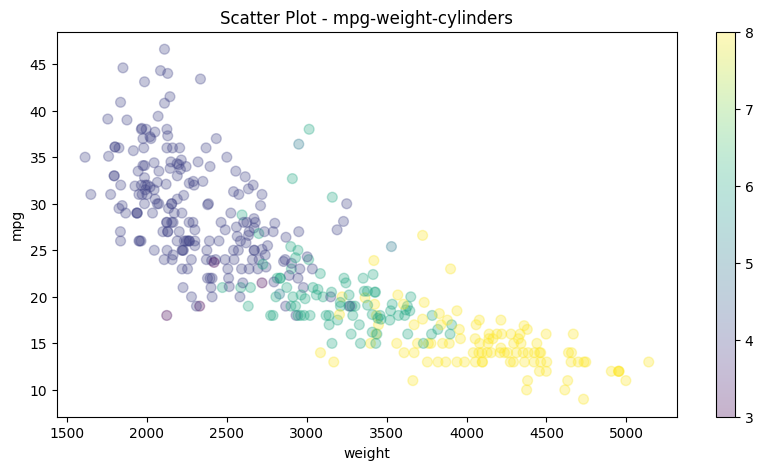

In [64]:
## 미션4
# 데이터 시각화 심화 실습
# 판다스를 이용하여 다음 두 가지 시각화를 수행하세요.
# 미션 4-1: mpg(연비)와 weight(무게)의 관계를 실린더(cylinders) 수에 따라 다른 색상으로 나타내는 산점도를 그리세요.

import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv')

# 열 이름을 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',	'weight', 'acceleration', 'model year', 'origin', 'name']

# mpg(연비)와 weight(무게) 열을 선택하여 산점도 그리기 
# c= (색상), s= (크기), cmap= (컬러맵)
df.plot(x='weight', y='mpg', kind='scatter', c=df['cylinders'], figsize=(10,5), marker='o', cmap='viridis', s=50, alpha=0.3)
plt.title('Scatter Plot - mpg-weight-cylinders')

plt.show()

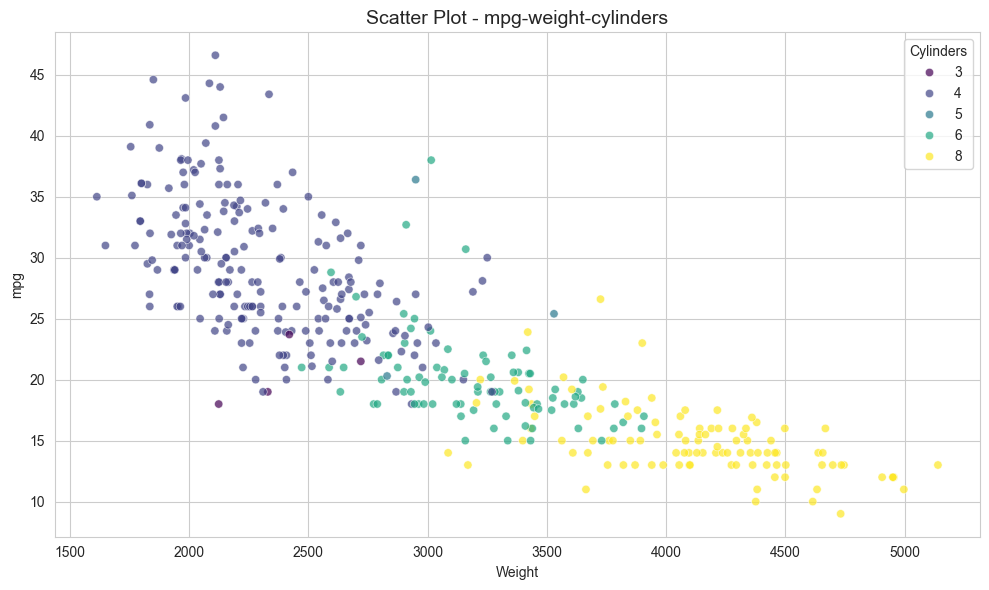

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정 (선택)
sns.set_style('whitegrid')  # 또는 'darkgrid', 'ticks', 'white', 'dark'

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='weight',
    y='mpg',
    hue='cylinders',        # 색상 그룹
    # size='cylinders',       # 점 크기 비례
    sizes=(50, 300),        # 점 크기 범위 설정
    palette='viridis',      # 색상 맵
    alpha=0.7,              # 투명도
    marker='o'              # 마커 형태
)

plt.title('Scatter Plot - mpg-weight-cylinders', fontsize=14)
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.legend(title='Cylinders', loc='upper right')
plt.tight_layout()
plt.show()

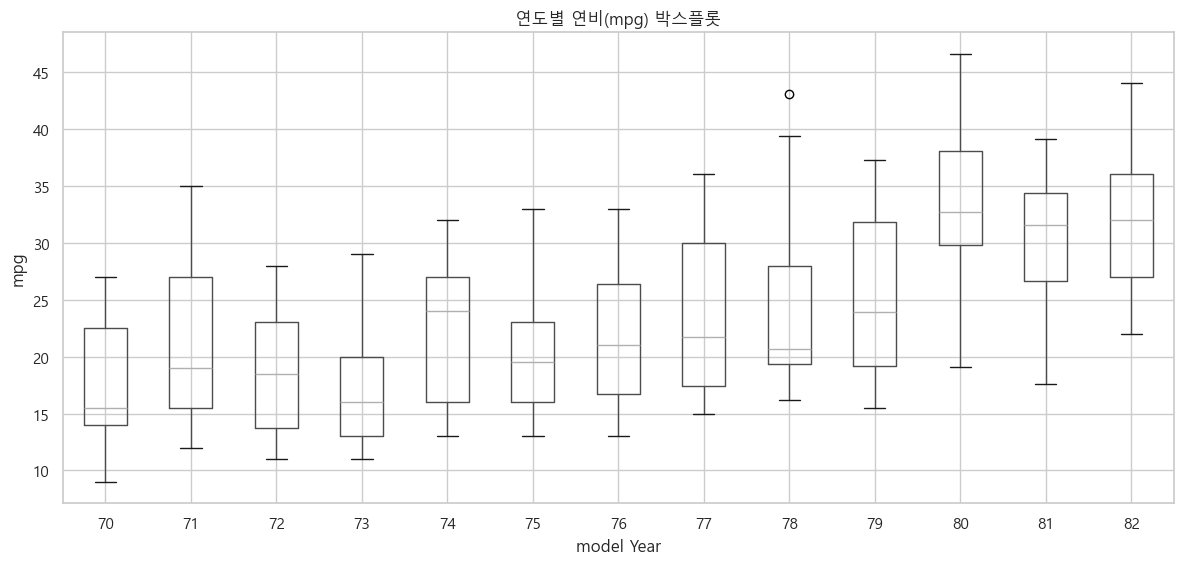

In [82]:
# 미션 4-2: model_year에 따른 연비(mpg)의 변화를 박스플롯으로 시각화하세요.
# 박스 플롯

import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv')

# 열 이름을 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',	'weight', 'acceleration', 'model year', 'origin', 'name']

# 박스플롯 (groupby 사용 전 pandas 내장 방식)
df.boxplot(column='mpg', by='model year', figsize=(12, 6))

plt.title('연도별 연비(mpg) 박스플롯')
plt.suptitle('')  # 기본 제목 제거
plt.xlabel('model Year')
plt.ylabel('mpg')
plt.tight_layout()
plt.show()

C:\Users\1\AppData\Local\Temp\ipykernel_9628\2535728460.py:24: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2535728460.py:24: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2535728460.py:24: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2535728460.py:24: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2535728460.py:24: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2535728460.py:24: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Lo

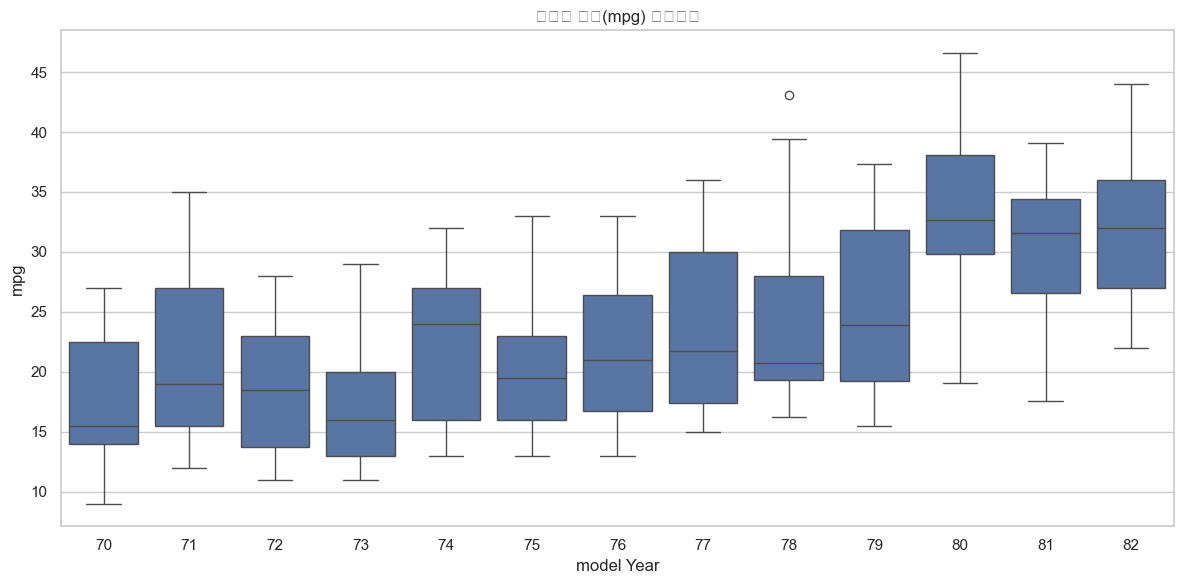

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = fm.FontProperties(fname=font_path).get_name()
# matplotlib 기본 폰트 설정
plt.rc('font', family=font_name)
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일 설정
sns.set(style='whitegrid')

# 박스플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='model year', y='mpg', data=df)

plt.title('연도별 연비(mpg) 박스플롯')
plt.xlabel('model Year')
plt.ylabel('mpg')
plt.tight_layout()
plt.show()

In [90]:
## 미션 5
# 상관 분석 및 히트맵 시각화
# 다음 사항을 수행하여 데이터의 상관관계를 분석하세요.
# 미션 5-1: 데이터의 모든 수치형 열 간 상관계수 매트릭스를 구하세요.

import pandas as pd
import matplotlib.pyplot as plt

# 스타일 서식 지정
plt.style.use('default')

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv')

# 열 이름을 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',	'weight', 'acceleration', 'model year', 'origin', 'name']

print(df.dtypes)

# 상관계수
print(df.corr(numeric_only=True)) #numeric_only=True: 산술 데이터를 가진 7개 열에 대한 평균값만 계산

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object
                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775412     -0.803972 -0.831558      0.419133   
cylinders    -0.775412   1.000000      0.950718  0.896623     -0.503016   
displacement -0.803972   0.950718      1.000000  0.932957     -0.542083   
weight       -0.831558   0.896623      0.932957  1.000000     -0.416488   
acceleration  0.419133  -0.503016     -0.542083 -0.416488      1.000000   
model year    0.578667  -0.344729     -0.367470 -0.305150      0.284376   
origin        0.562894  -0.561796     -0.608749 -0.580552      0.204102   

              model year    origin  
mpg             0.578667  0.562894  
cylinders      -0.344729 -0.561796  
displacement   -0.367470 -0.608749  
weight         -0.305

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object


C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:33: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:33: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:33: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:33: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:33: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Loc

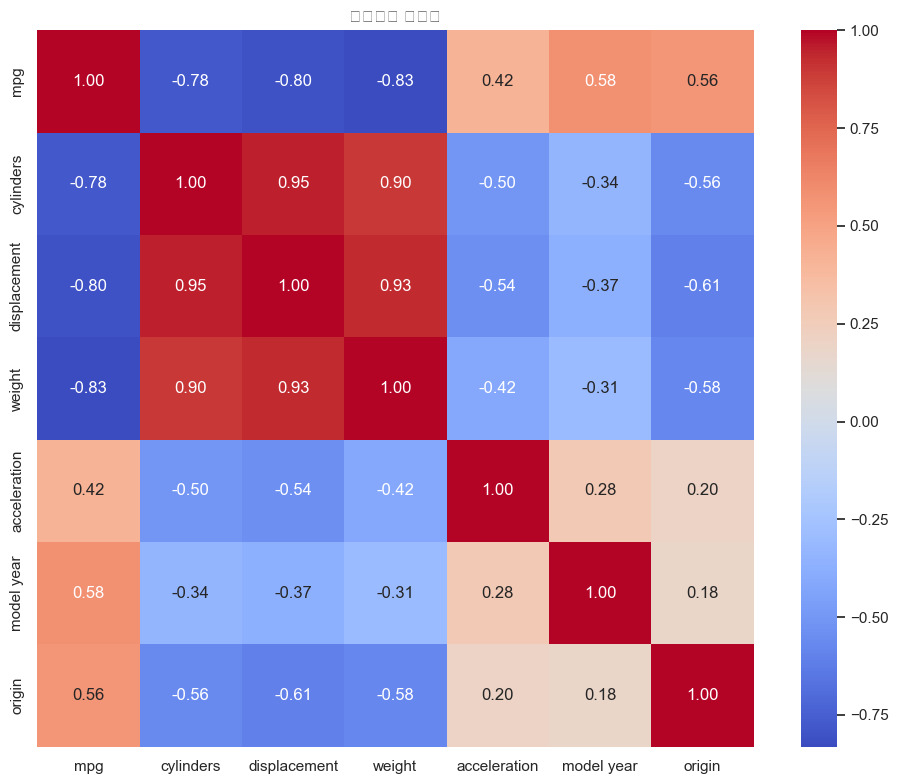

C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:45: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:45: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:45: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:45: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:45: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:45: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Loc

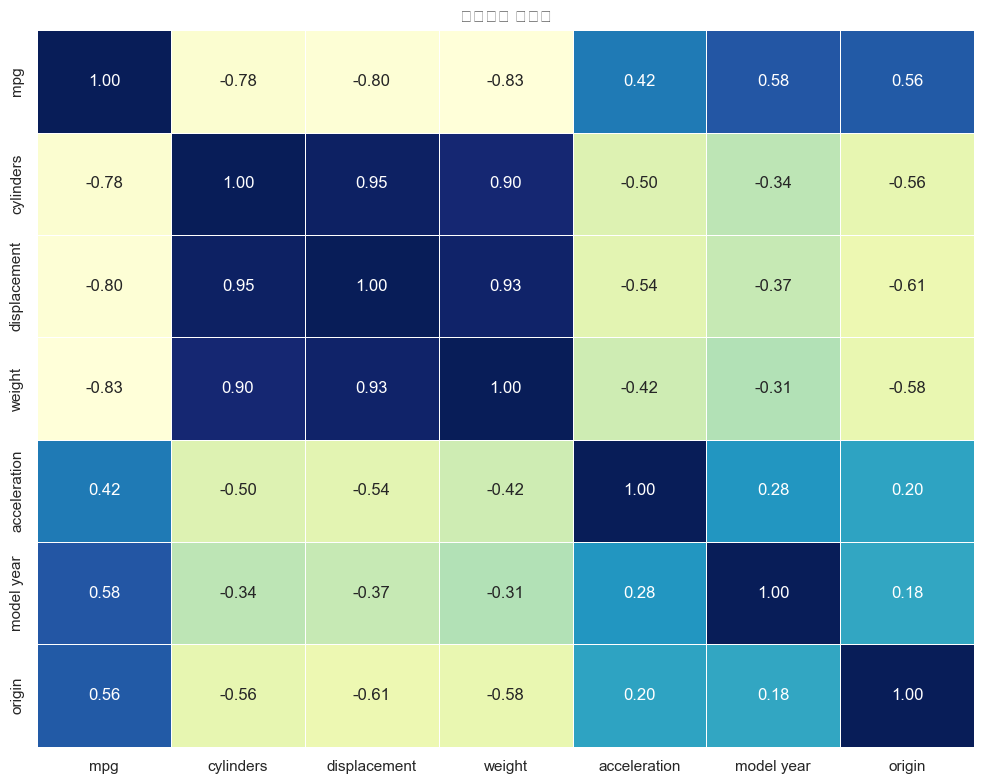

C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:55: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:55: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:55: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:55: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:55: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Local\Temp\ipykernel_9628\2942498657.py:55: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\1\AppData\Loc

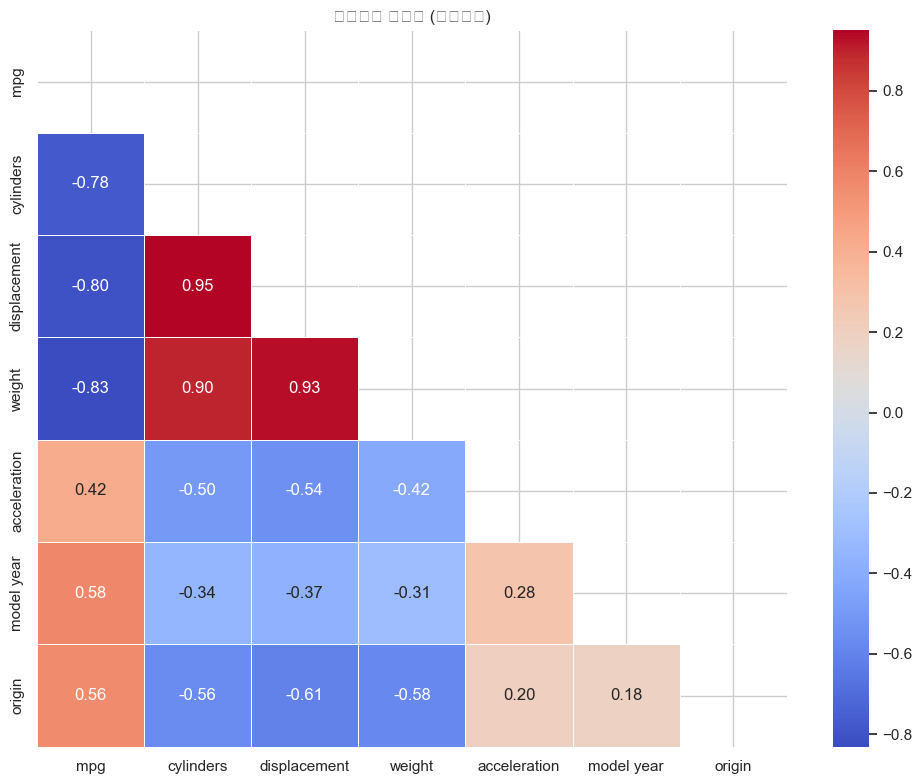

In [98]:
# 미션 5-2: Seaborn을 활용하여 상관계수 히트맵(heatmap)을 시각화하고, 가장 강한 상관관계(절댓값 기준)를 갖는 두 변수의 이름을 적으세요.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv')

# 열 이름을 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',	'weight', 'acceleration', 'model year', 'origin', 'name']

print(df.dtypes)

# 수치형 데이터만 추출
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
corr = numeric_df.corr()

# 시각화 스타일 설정
sns.set(style='whitegrid')

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, # 데이터프레임
            annot=True, # 셀 안에 상관계수 숫자 표시
            fmt='.2f', # 소수점 둘째 자리까지 표시
            cmap='coolwarm', # 색상
            square=True)  # 셀 정사각형 비율
plt.title('상관계수 히트맵')
plt.tight_layout()
plt.show()


# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, # 데이터프레임
           annot=True, fmt='.2f', #셀 안에 상관계수 숫자 표시, 소수점 둘째 자리까지 표시
           cmap='YlGnBu', # 색상
           linewidth=.5, # 셀 경계선 굵기
           cbar=False) # 오른쪽 컬러바 제거
plt.title('상관계수 히트맵')
plt.tight_layout()

plt.show()

# 마스킹: 상삼각형만 표시
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('상관계수 히트맵 (상삼각만)')
plt.tight_layout()
plt.show()